source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [39]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from mpl_toolkits.mplot3d import Axes3D
import datetime

In [3]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 92AA-AFC5

 Directory of C:\Users\vagne\Desktop\PYTHON\TTP_1

09/25/2019  03:44 PM    <DIR>          .
09/25/2019  03:44 PM    <DIR>          ..
09/25/2019  03:43 PM    <DIR>          .ipynb_checkpoints
09/25/2019  03:43 PM           132,891 backup.ipynb
09/25/2019  03:37 PM           132,891 youtube.ipynb
               2 File(s)        265,782 bytes
               3 Dir(s)  903,933,902,848 bytes free


In [2]:
path = 'TTP_1_Data'
filename1 = os.path.join('..', path,'dataframe.csv')
filename2 = os.path.join('..', path,'dataframe_all_timestamps.csv')

df = pd.read_csv(filename1)
df_all_timestamps = pd.read_csv(filename2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 19 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [13]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [3]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 
import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

# you_short = df_all_timestamps.head (4000)
# you_short1 = df.head (1000)

In [19]:
df_all_timestamps.describe ()

,category_id,views,likes,dislikes,comment_count
count,356350.000000,3.563500e+05,3.563500e+05,3.563500e+05,3.563500e+05
mean,20.209847,1.383542e+06,3.964151e+04,2.130516e+03,4.366423e+03
std,7.166210,7.278916e+06,1.693050e+05,1.977425e+04,2.408002e+04
min,1.000000,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,5.076500e+04,7.700000e+02,4.500000e+01,1.230000e+02
50%,23.000000,1.907045e+05,3.875000e+03,1.940000e+02,5.550000e+02
75%,24.000000,6.874125e+05,1.893700e+04,7.980000e+02,2.148000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.753274e+06,1.228655e+06


In [37]:
you_short.head(3)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR


In [29]:
#print (you_short.country)

In [ ]:
%matplotlib inline 
plt.plot(you_short1['views'], you_short1['likes'], 'ro')

In [ ]:
you_short1 .plot(kind='line',xlim=(0,1000),ylim=(0,100),color='red',logx=True)

In [ ]:
sns.lmplot(x = 'country', y = 'likes', 
           data = you_short1, 
           hue = "country", 
           palette="Set2", fit_reg = False)

In [ ]:
sns.catplot(x="likes",y="country",data = you_short1)

In [ ]:
sns.catplot(x="likes", y="country", hue="country", kind="swarm", data = you_short1)

In [ ]:
sns.catplot(x="country", y="likes", kind="swarm", data = you_short1)

In [54]:
print (stat.variance(you_short1.likes))
print (stat.pvariance(you_short1.likes))

351461119.06025624
351109657.941196


In [ ]:
fig = plt.figure(figsize=(9, 10))
ax = fig.gca()
sns.set_style("whitegrid")
sns.boxplot(data = you_short1, x = 'country', y = 'views', hue="country")

In [23]:
df_all_timestamps.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'category', 'publish_date', 'publish_time', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'country'],
      dtype='object')

Analisar qual pais tem mais visualizacoes e curtidas. Relaciinar visualizacoes e curtidas para saber 
qual tem impacto em 'vendas'. Fazer uma analise de tendencia de 'vendas' (visualisacoes x data).
Concluir com local e espectativa de 'ganho'.

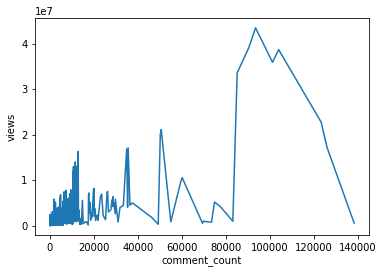

In [30]:
sns.lineplot(x="comment_count", y="views", data = you_short)

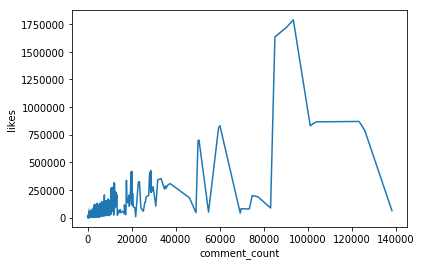

In [31]:
sns.lineplot(x="comment_count", y="likes", data = you_short)

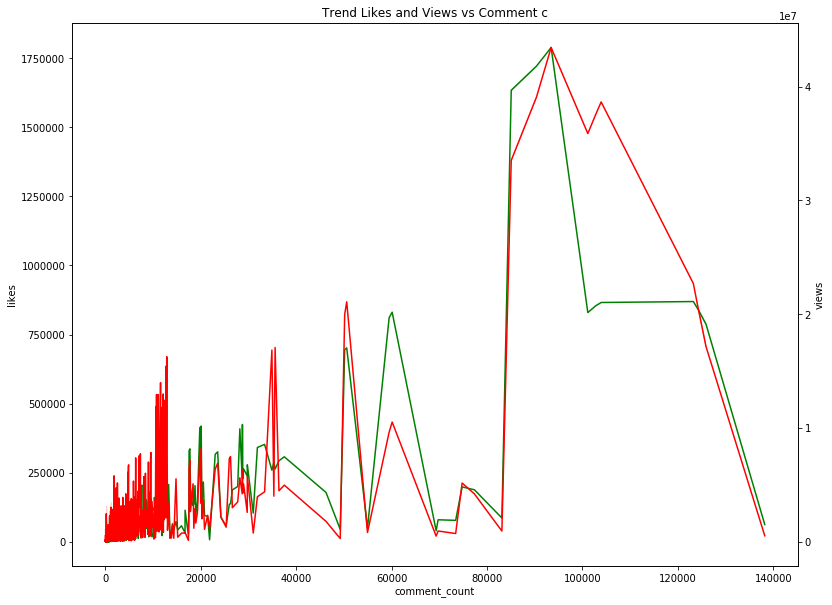

In [32]:
fig = plt.figure(figsize=(13, 10))
ay = fig.gca ()
sns.lineplot(x="comment_count", y="likes", data = you_short, color = 'g',legend=False)
ax2 = plt.twinx()
sns.lineplot(x="comment_count", y="views", data = you_short, color = 'r', legend=False, ax=ax2)

ay.set_title ('Trend Likes and Views vs Comment c')
plt.show()

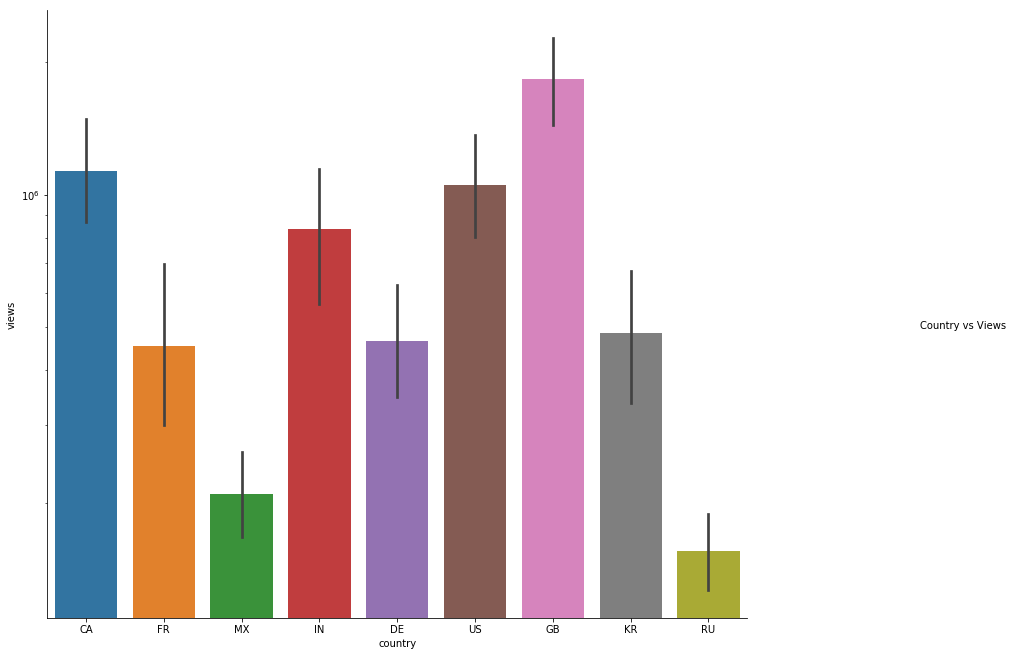

In [33]:
g = sns.catplot(x="country",y= 'views',kind='bar',data = you_short)
g.set(yscale="log")
g.add_legend(title = "Country vs Views")
g.fig.set_size_inches(17, 10)

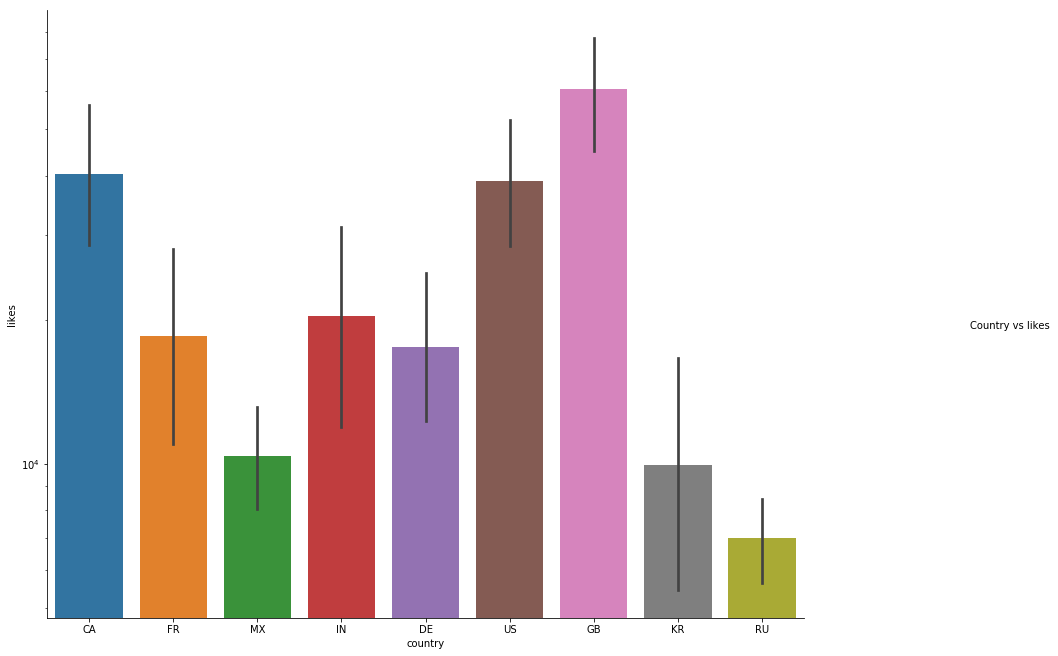

In [34]:
g = sns.catplot(x="country",y= 'likes',kind='bar',data = you_short)
g.set(yscale="log")
g.add_legend(title = "Country vs likes")
g.fig.set_size_inches(17, 10)

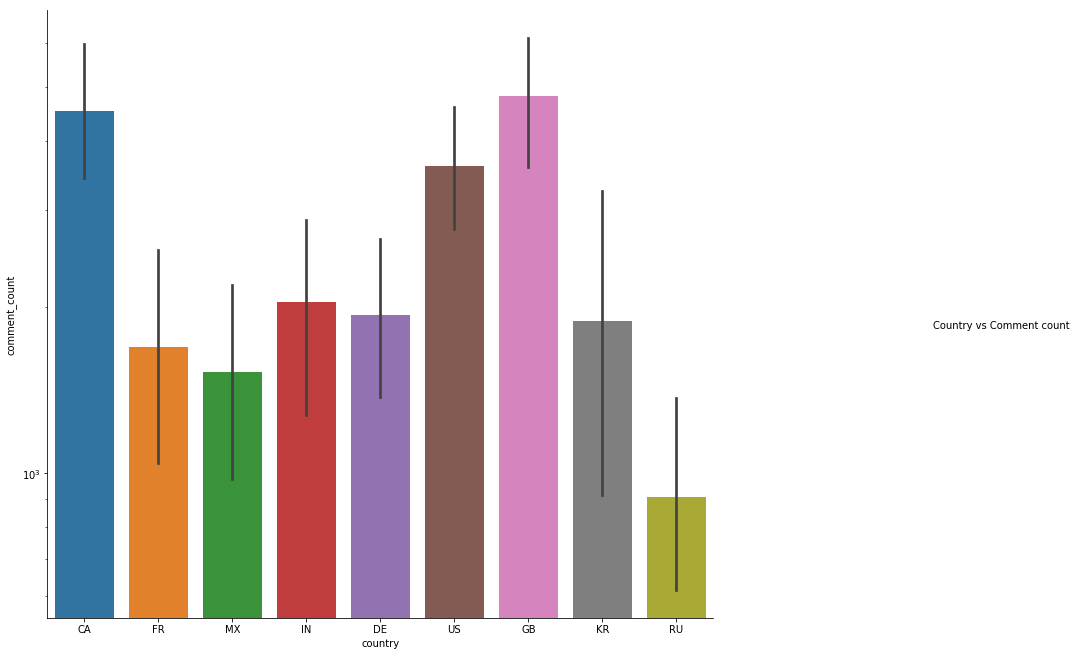

In [35]:
g = sns.catplot(x="country",y= 'comment_count',kind='bar',data = you_short)
g.set(yscale="log")
g.add_legend(title = "Country vs Comment count")
g.fig.set_size_inches(17, 10)

 select all rows from dataframe where 'views' < 10000
df_all_timestamps[df_all_timestamps['views'].lt(10000)]
 select views likes and dislikes from dataframe where country is in US MX or CA
df_all_timestamps[df_all_timestamps['country'].isin(['US','MX','CA'])]
                                                [['views','likes','dislikes']]

per_ana = you_short1[you_short1['country'].isin(['GB'])][['views','likes']]
print (per_ana.sum('views'))

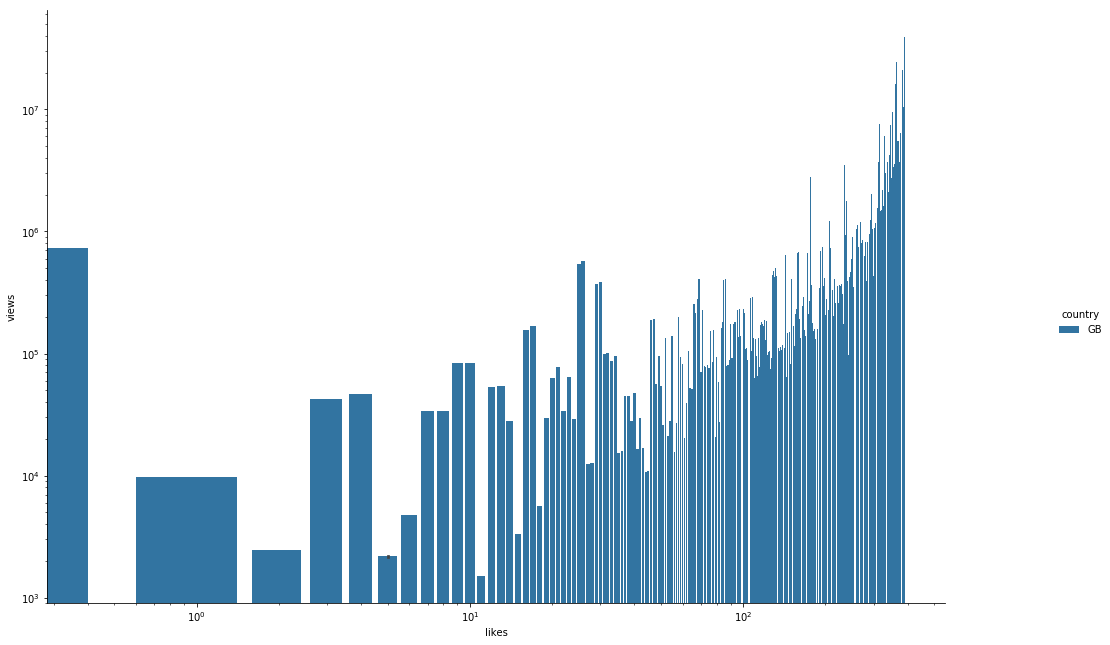

In [61]:
gb_anal = you_short[you_short['country'].isin(['GB'])]
a = sns.catplot(x="likes",y= 'views', hue = 'country', kind='bar',data = gb_anal)
a.set(yscale="log", xscale = 'log')
a.fig.set_size_inches(17, 10)

In [58]:
#df_all_timestamps ['year'] = pd.DatetimeIndex(df_all_timestamps ['publish_time']).year
#df_all_timestamps ['month'] = pd.DatetimeIndex(df_all_timestamps ['publish_time']).month
#a = sns.catplot(x = df_all_timestamps ['year'], y= 'views', hue = 'country', kind='bar',data = gb_anal)
#b = sns.catplot(x = df_all_timestamps ['month'], y= 'views', hue = 'country', kind='bar',data = gb_anal)